# Preliminaries

Importing python packages and setting display parameters

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
%matplotlib inline

plt.style.use("default")
plt.style.use("bmh")
# plt.rcParams.update({"figure.autolayout": True})
plt.rcParams["figure.figsize"] = (12, 9)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 100

In [3]:
pd.set_option("display.latex.repr", True)

In [4]:
pd.set_option("display.latex.longtable", True)

# Fitness Landscape Definition

In [5]:
# Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

# Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

# Problem definition
def f(x, y):
    D = 2
    alpha = 1 / 8

    x = (x - 5) / 6
    y = (y - 5) / 6

    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = (0.5 * (x ** 2 + y ** 2) + (x + y)) / D

    return a + b + 0.5

In [6]:
# Testing the minimum
print(f(-1, -1))

0.0


In [7]:
# Testing the function
print(f(-1.0, -1.0), f(-11.0, -9.0), f(11.0, 3.0), f(-6.01717, 9.06022))

0.0 2.941368139329697 2.082094654525758 2.040654385424956


## Visualizing Landscape

In [8]:
# Visualization parameters
grph_steps = 61
a = 15
b = -60
ratio_w = 1.3
ln = 0.75

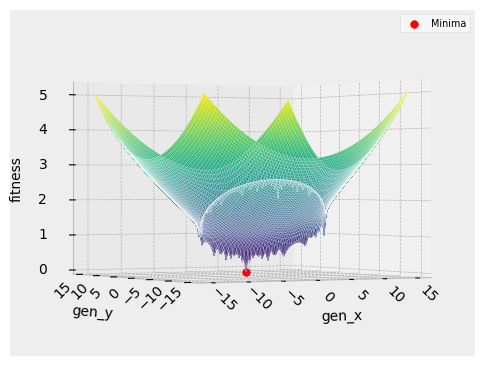

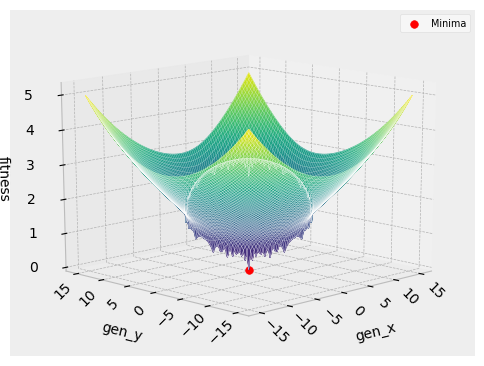

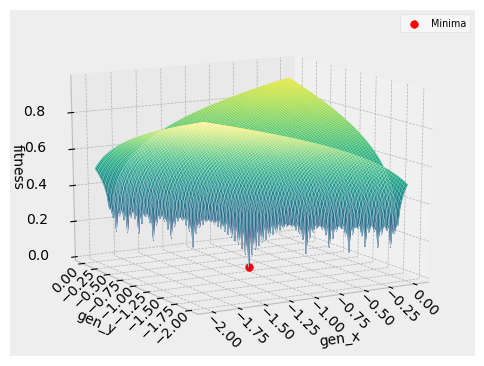

In [9]:
def plot_land(f, domain, point, steps, a=30, b=-60, imgsize=(15, 10), 
              min_f='None', ratio_w=1.5, ln=1):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator
    
    (x_min, x_max, y_min, y_max) = domain
    (x_plot, y_plot) = point

    # Create arrays
    # # meshgrid produces all combinations of given x and y
    x = np.linspace(x_min, x_max, steps)
    y = np.linspace(y_min, y_max, steps)
    X, Y = np.meshgrid(x, y)  # combine all x with all y
    # # Applying the function
    Z = f(X, Y)

    # Set up the axes
    imgsize=(6,4.5)
    fig = plt.figure(figsize=imgsize)
    ax = fig.gca(projection='3d')

    # Plotting the surface
    # # Some values for the surface plot
    norm = plt.Normalize(Z.min(), Z.max())
    colors = cm.viridis(norm(Z))
    rcount, ccount, _ = colors.shape
    ax.view_init(a, b)  # Visualization angles
    
    # # Plotting surface
    surf = ax.plot_surface(X, Y, Z, rcount=rcount,
                           ccount=ccount, facecolors=colors, shade=False)
    ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, linewidth=.15, color="white")
    
    # # Plotting points
    ax.scatter(x_plot, y_plot, f(x_plot, y_plot),
               color='r', s=30, label='Minima')
    
    #surf.set_facecolor((0, 0, 0, 0))
    if min_f != 'None':
        ax.set_zlim(bottom=min_f)
    ax.set_xlabel('gen_x', fontsize="medium")
    ax.set_ylabel('gen_y', fontsize="medium")
    ax.set_zlabel('fitness', fontsize="medium")
    # ax.set_aspect('auto')
    # ax.autoscale_view(True, True, True, True)
    ax.legend(facecolor="white", framealpha=0.5, fontsize="x-small")
       
    for label in ax.get_xticklabels():
        label.set_verticalalignment('center')
        label.set_horizontalalignment('center')
    for label in ax.get_yticklabels():
        label.set_verticalalignment('center')
        label.set_horizontalalignment('center')
    for label in ax.get_zticklabels():
        label.set_verticalalignment('center')
        label.set_horizontalalignment('right')
    
    ax.tick_params(axis="x",labelrotation=-45)   
    ax.tick_params(axis="y",labelrotation=45)
    
    plt.show()

plot_land(
    f, domain, point, 91, a=0, b=-120, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

plot_land(
    f, domain, point, 91, a=15, b=-135, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

domain_min = (-2, 0, -2, 0)
plot_land(
    f, domain_min, point, 91, a=15, b=-120, imgsize=img_size, ratio_w=ratio_w, ln=ln, min_f=0
)

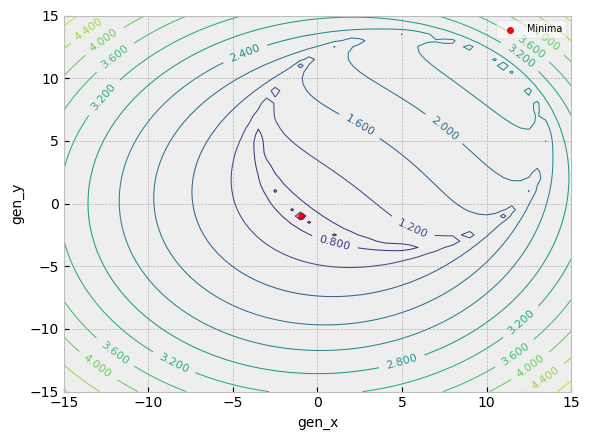

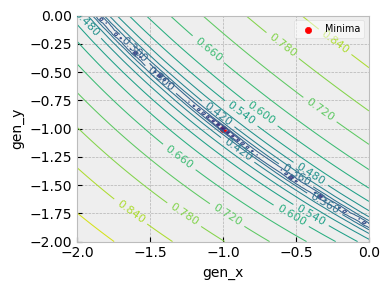

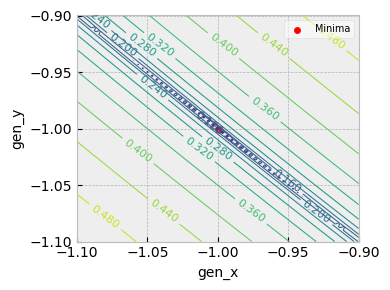

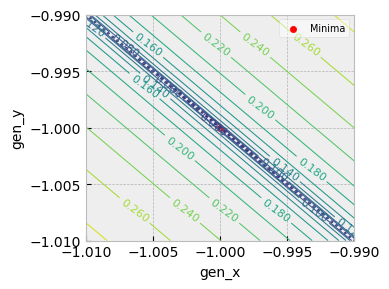

In [10]:
def plot_land_2d(f, domain, point, steps, a=30, b=-60, imgsize=(15, 10), min_f='None', ratio_w=1.5, ln=1):
    (x_min, x_max, y_min, y_max) = domain
    if point != "None":
        (x_plot, y_plot) = point

    # Create arrays
    # # meshgrid produces all combinations of given x and y
    x = np.linspace(x_min, x_max, steps)
    y = np.linspace(y_min, y_max, steps)
    X, Y = np.meshgrid(x, y)  # combine all x with all y
    # # Applying the function
    Z = f(X, Y)

    # Set up the axes with gridspec
    fig, ay = plt.subplots(figsize=imgsize)
    
    # Plotting level curves
    # # Plotting points
    if point != "None":
        ay.scatter(x_plot, y_plot, color='r', s=20, label='Minima')
    # # Plotting contour
    levels = 15
    CS = ay.contour(X, Y, Z, levels, cmap='viridis', linewidths=ln)
    ay.clabel(CS, fmt='%2.3f', inline=True, fontsize=8)
    ay.set_xlabel('gen_x', fontsize="medium")
    ay.set_ylabel('gen_y', fontsize="medium")
    # ay.set_aspect('auto')
    ay.autoscale_view(True, True, True)
    ay.legend(facecolor="white", framealpha=0.5, fontsize="x-small")

    # adjusting
    plt.tight_layout()
    plt.show()

imgsize_single = (6,4.5)
plot_land_2d(f, domain, point, grph_steps, a=0, b=60, imgsize=imgsize_single, ratio_w=ratio_w, ln=ln, min_f=0)

imgsize_single_min = (4,3)
domain_min = (-2, 0, -2, 0)
plot_land_2d(f, domain_min, point, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

domain_min = (-1.1, -.9, -1.1, -.9)
plot_land_2d(f, domain_min, point, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

domain_min = (-1.01, -.99, -1.01, -.99)
plot_land_2d(f, domain_min, point, grph_steps, a=0, b=60, imgsize=imgsize_single_min, ratio_w=ratio_w, ln=ln, min_f=0)

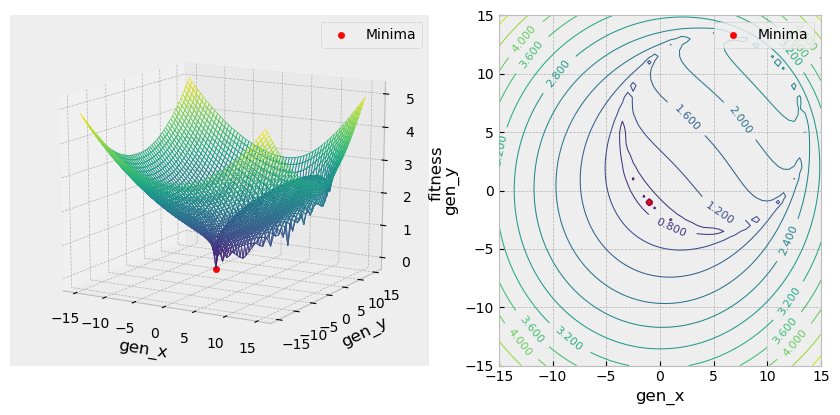

In [11]:
EA_plt_land(
    f, domain, point, grph_steps, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln
)

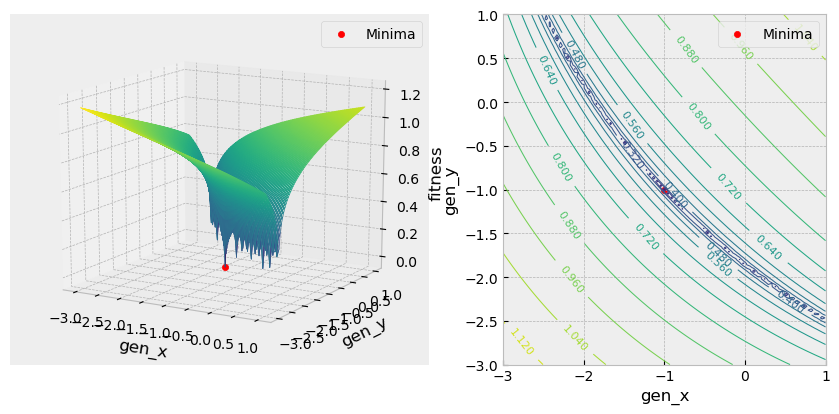

In [12]:
domain_min = (-3, 1, -3, 1)
EA_plt_land(
    f, domain_min, point, 91, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln
)

# Running the Evolutionary Algorithm

## Setting the EA's parameters

In [13]:
# starting seed
np.random.seed(42)

In [14]:
# Algorithm parameters
## Number of replicates, and generations per experiment
rep_n = 1
gen_f = 50

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = "fitness_proportional_selection"

b = 3
par_s = b * pop_s

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = "uniform"
### Mutation method, probability and size
mutation = "random_all_gau_dis"
mut_p = 0.5
mut_s = 2.5

## Survivors (New population) selection method
sur_selection = "tournament_k3"

## Single Run of the EA Experiments
1 Experiment
L-> 1 Parameter set for the experiment.
>L-> 1 Replicate.
>>L-> The replicate is affected due to the randomness seed.

In [15]:
%%time
genera_res, fitness_res = EA_exp(
    rep_n,
    gen_f,
    f,
    domain,
    pop_s,
    par_s,
    prog_s,
    mut_p,
    mut_s,
    par_selection,
    crossover,
    mutation,
    sur_selection,
)

Wall time: 875 ms


We query the members of the population of the last generation

In [16]:
z = gen_f
query = genera_res["generation"] == z
genera_res[query]

run  generation  birthdate    function   fitness     gen_x     gen_y
4000    0        50.0     2998.0  population  0.311329  0.690008 -2.294046
4001    0        50.0     2845.0  population  0.311329  0.690008 -2.294046
4002    0        50.0     2864.0  population  0.311329  0.690008 -2.294046
4003    0        50.0     2864.0  population  0.311329  0.690008 -2.294046
4004    0        50.0     2976.0  population  0.311329  0.690008 -2.294046
4005    0        50.0     2998.0  population  0.311329  0.690008 -2.294046
4006    0        50.0     2981.0  population  0.311329  0.690008 -2.294046
4007    0        50.0     3011.0  population  0.311329  0.690008 -2.294046
4008    0        50.0     3001.0  population  0.311329  0.690008 -2.294046
4009    0        50.0     2937.0  population  0.311329  0.690008 -2.294046
4010    0        50.0     2729.0  population  0.311329  0.690008 -2.294046
4011    0        50.0     2978.0  population  0.311329  0.690008 -2.294046
4012    0        50.0     3017.0  population  0.311329  0.690008 -2.294046
4013    0        50.0     2935.0  population  0.311329  0.690008 -2.294046
4014    0        50.0     2987.0  population  0.311329  0.690008 -2.294046
4015    0        50.0     2955.0  population  0.311329  0.690008 -2.294046
4016    0        50.0     2998.0  population  0.311329  0.690008 -2.294046
4017    0        50.0     3003.0  population  0.311329  0.690008 -2.294046
4018    0        50.0     2981.0  population  0.311329  0.690008 -2.294046
4019    0        50.0     2935.0  population  0.311329  0.690008 -2.294046

### Visualization

#### Fitness development

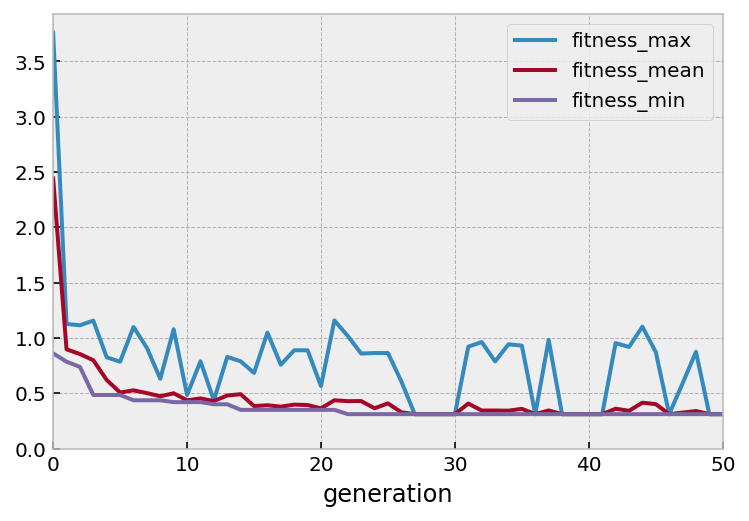

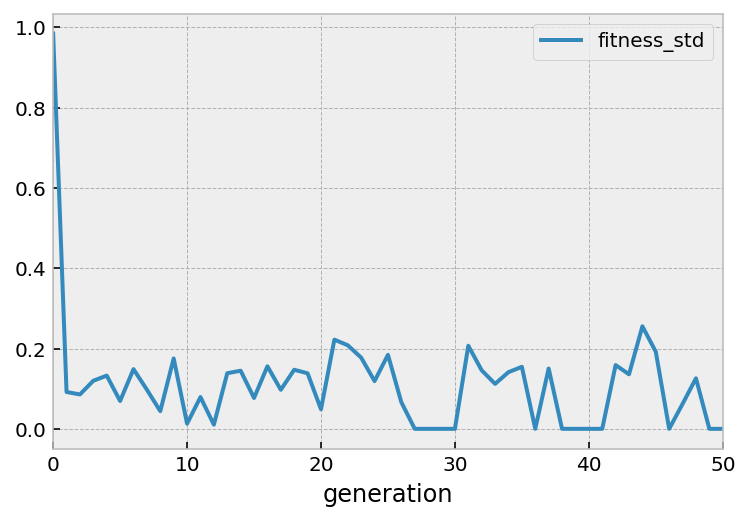

In [13]:
EA_fitn_dev(fitness_res, 0)

#### Population dynamics

First generation and its progeny

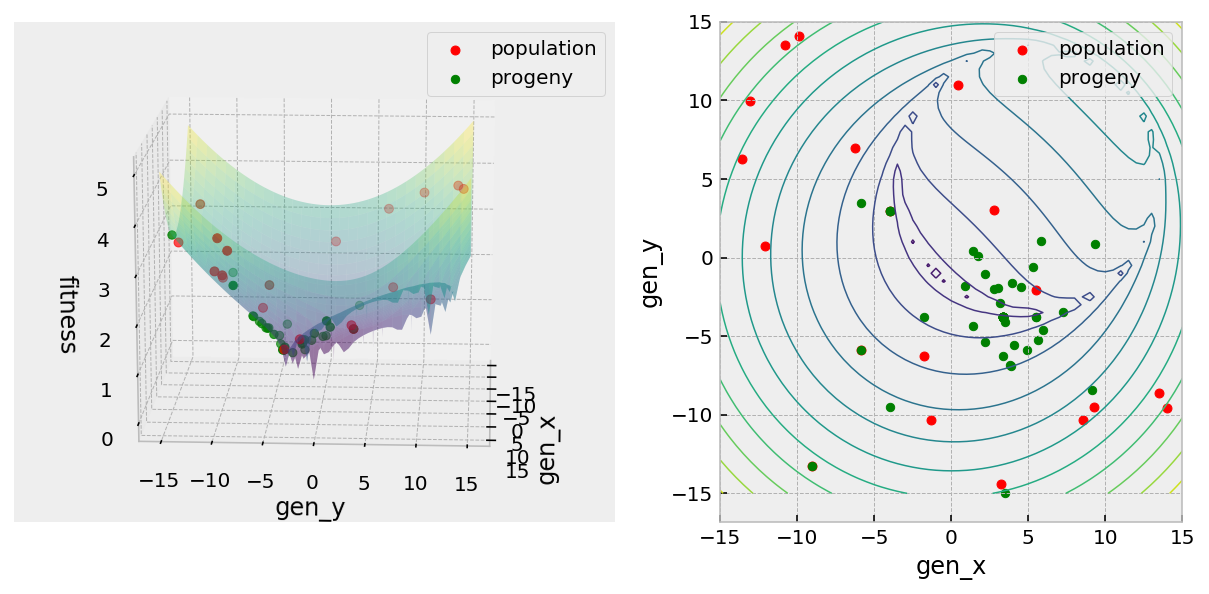

In [14]:
run_s = 0  # First (and only) run
gen_s = 0  # First generation
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    gen_s,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

Dynamics of the population

Generation 0


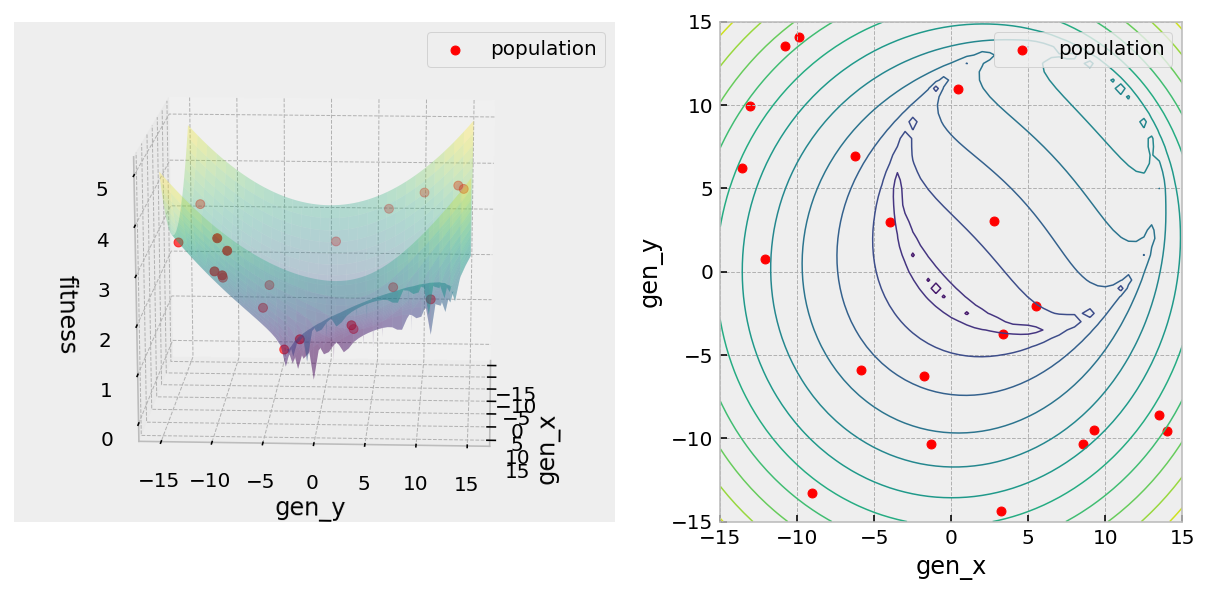

Generation 5


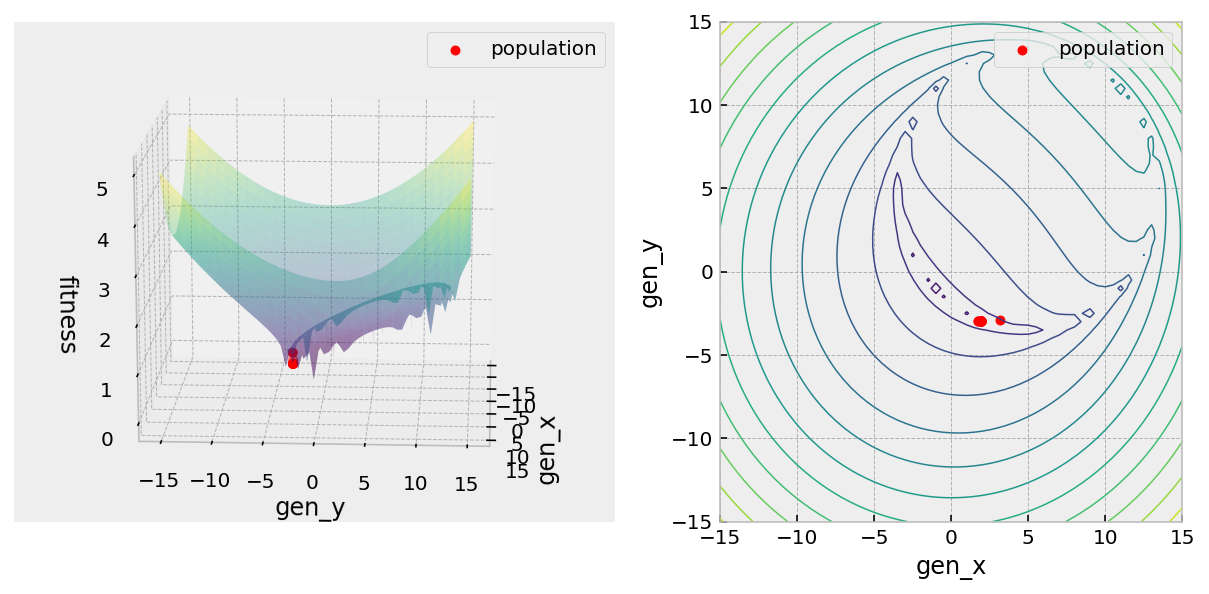

Generation 10


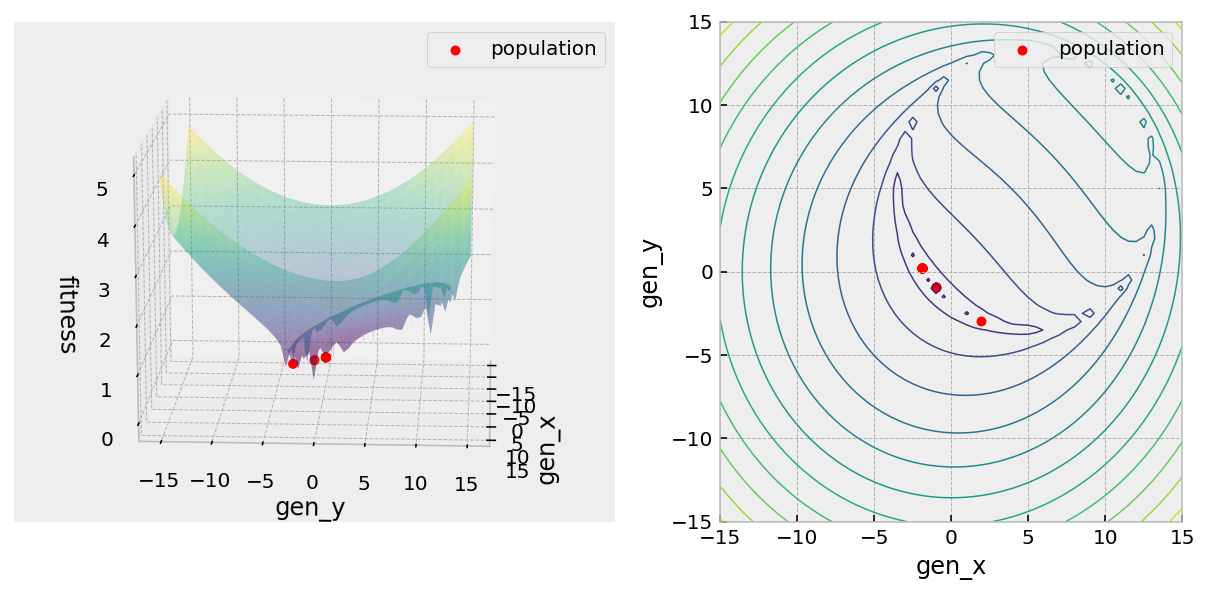

Generation 20


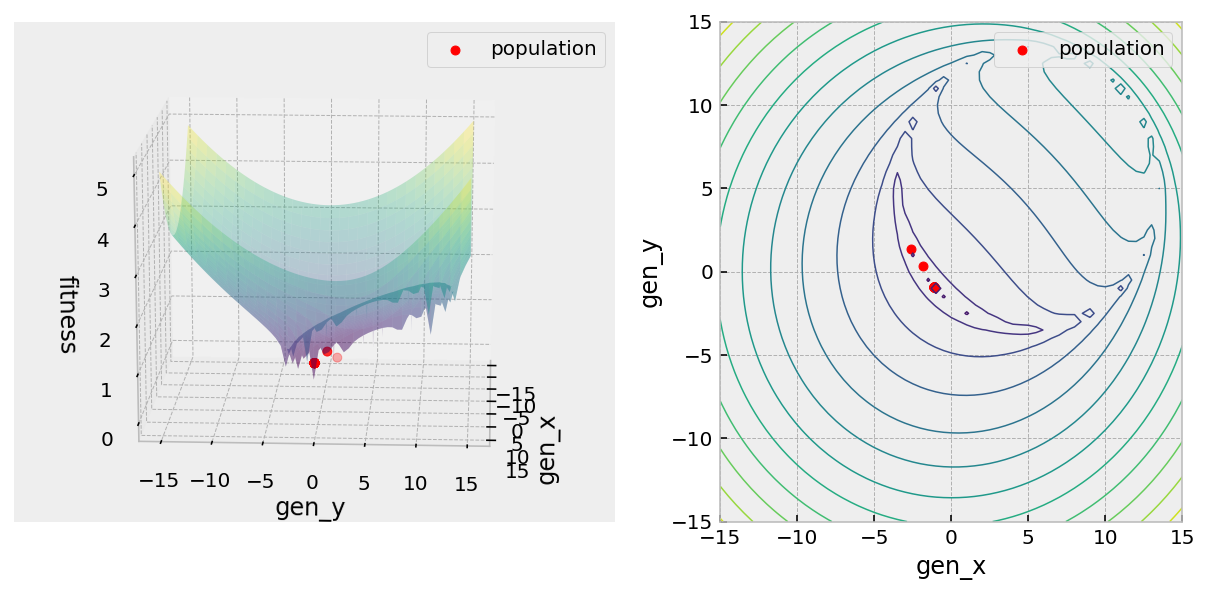

Generation 30


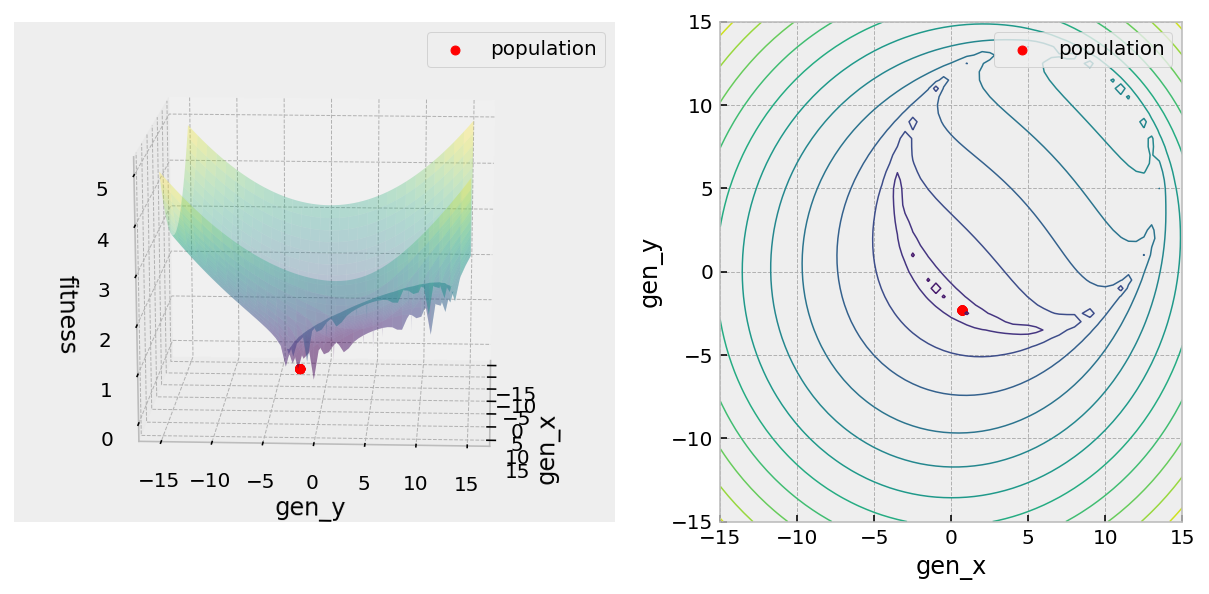

Generation 40


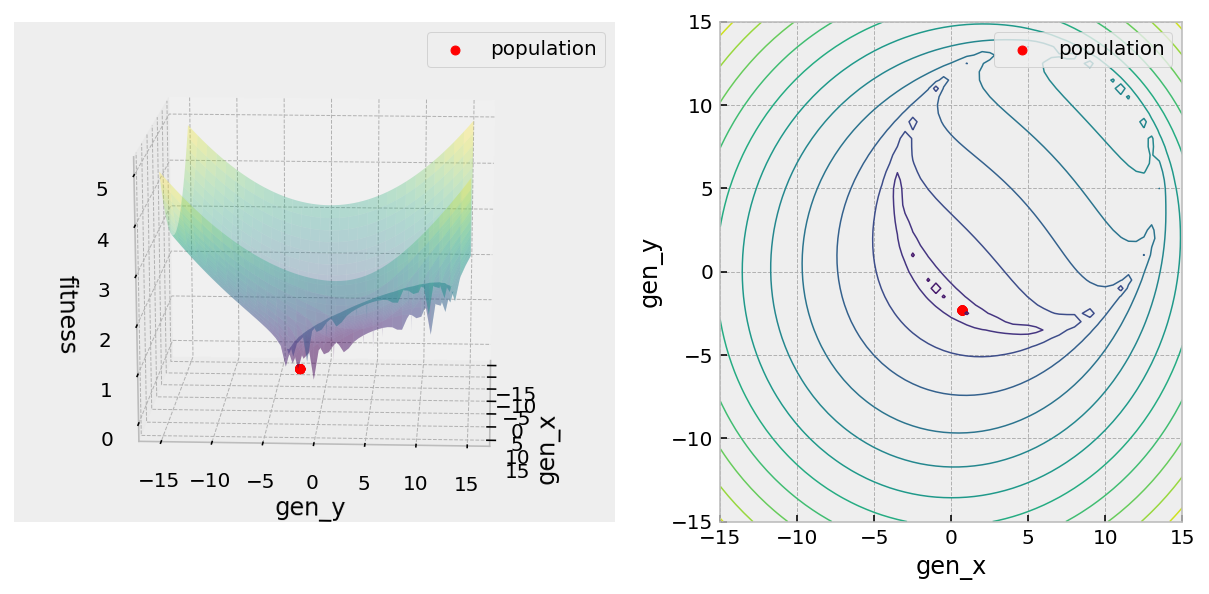

Generation 45


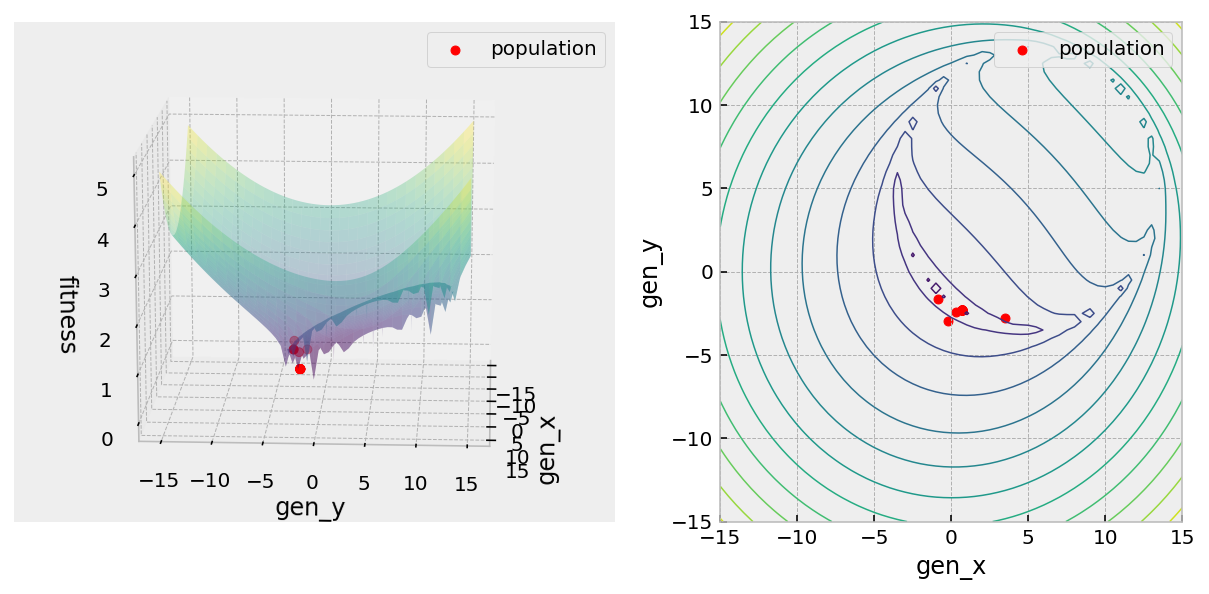

Generation 50


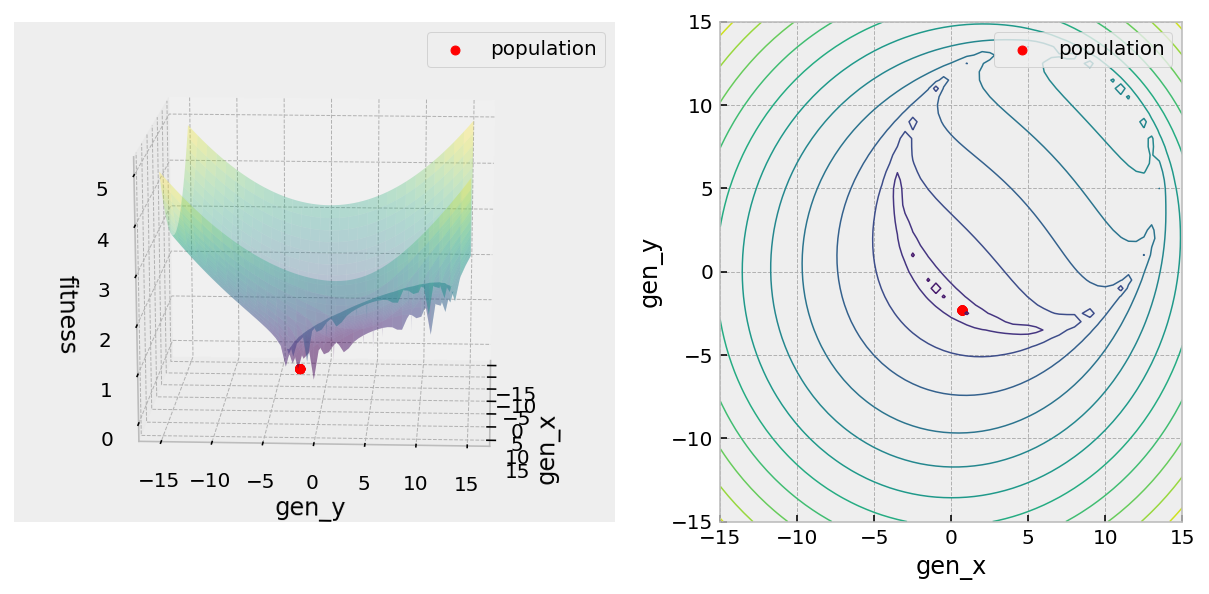

In [15]:
print("Generation 0")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    0,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 5")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    5,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 10")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    10,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 20")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    20,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 30")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    30,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 40")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    40,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 45")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    45,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 50")
EA_plt_pop(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    50,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

Dynamics of the population and its progeny

Generation 0


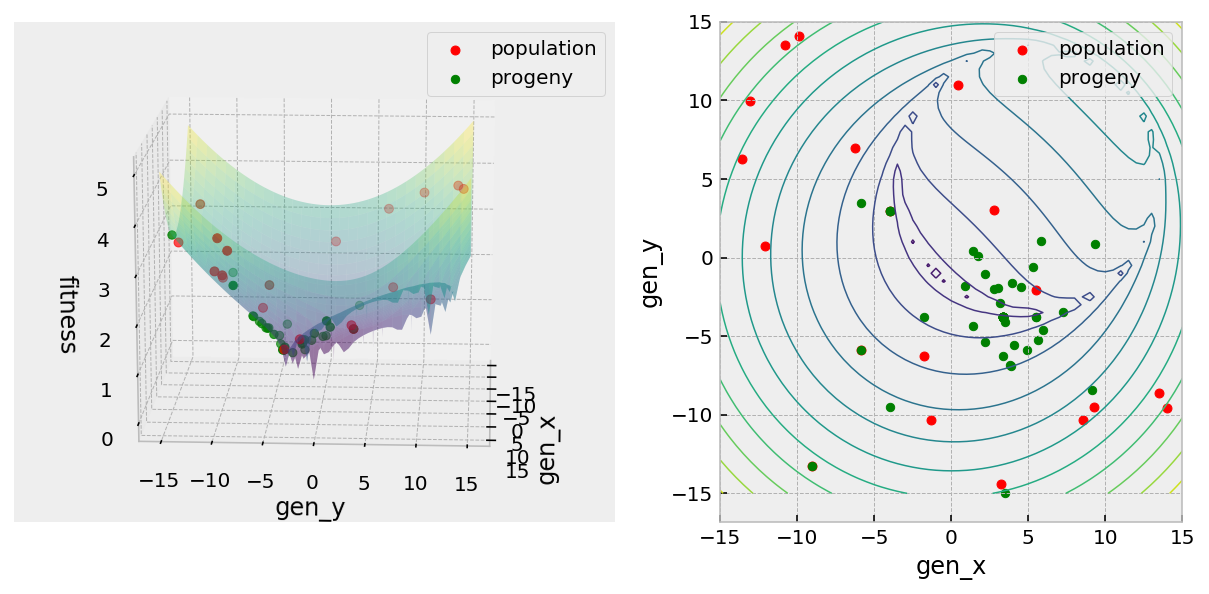

Generation 5


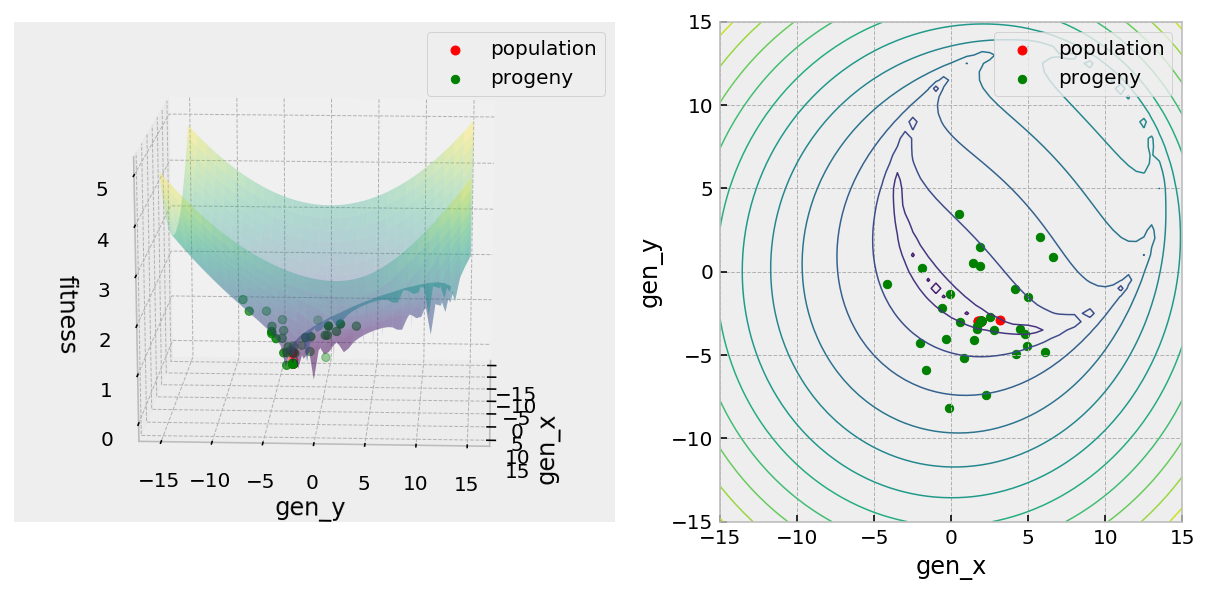

Generation 10


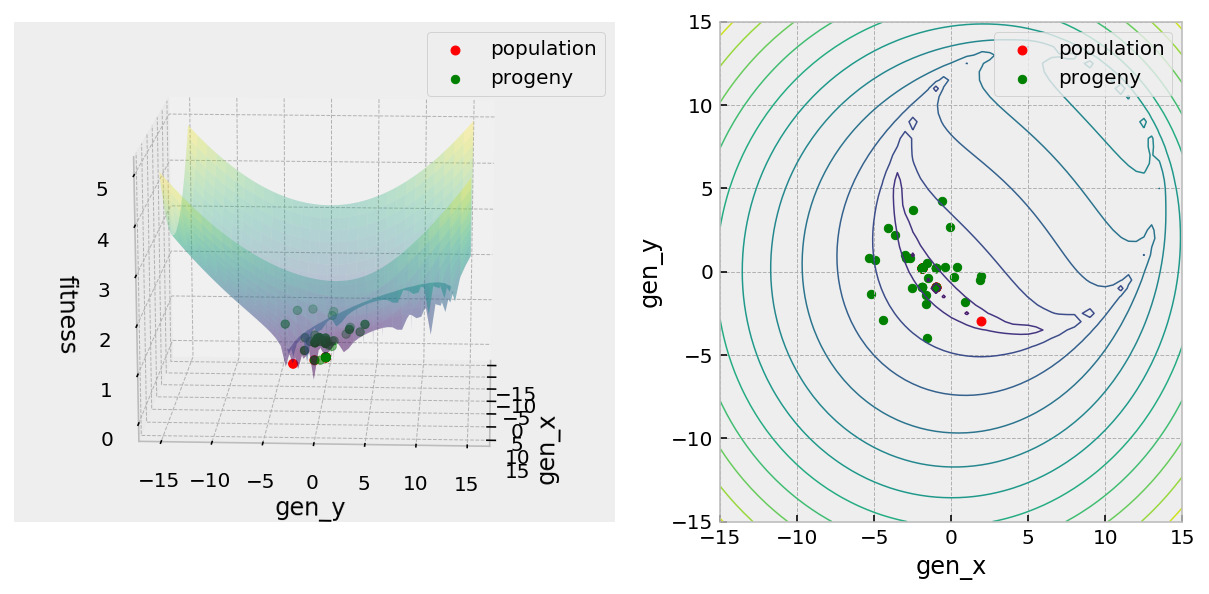

Generation 20


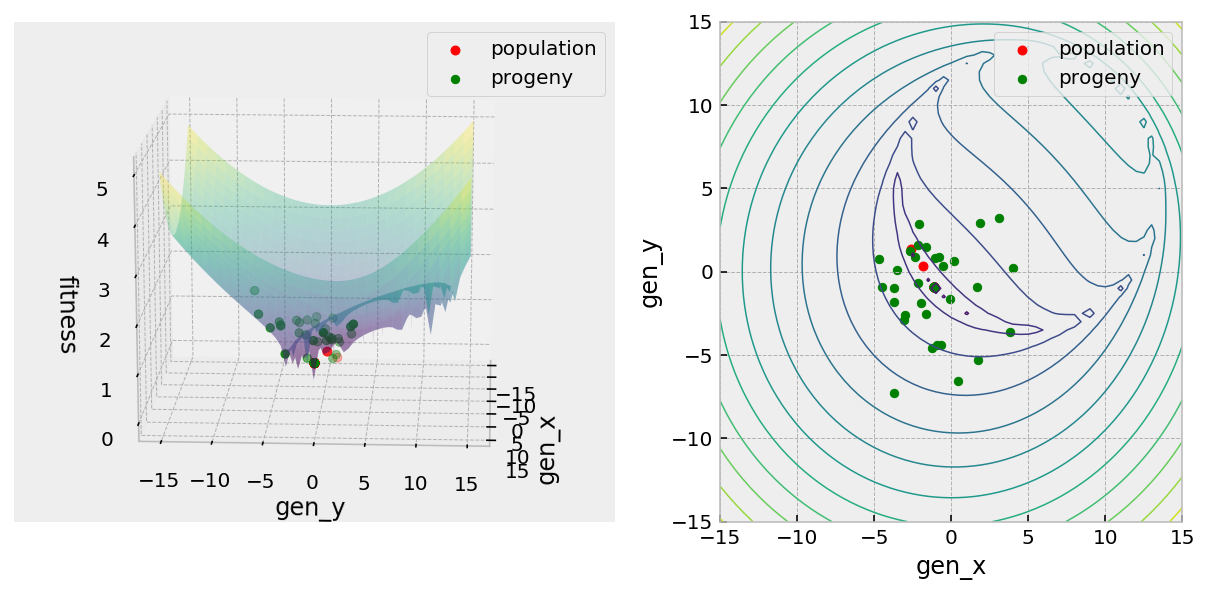

Generation 30


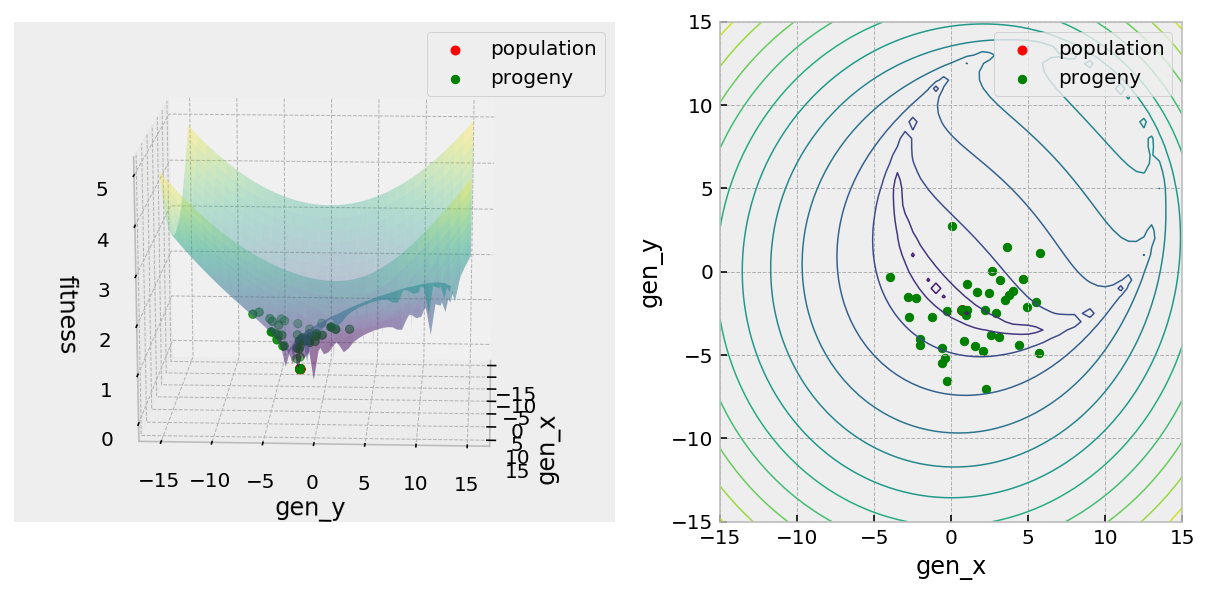

Generation 40


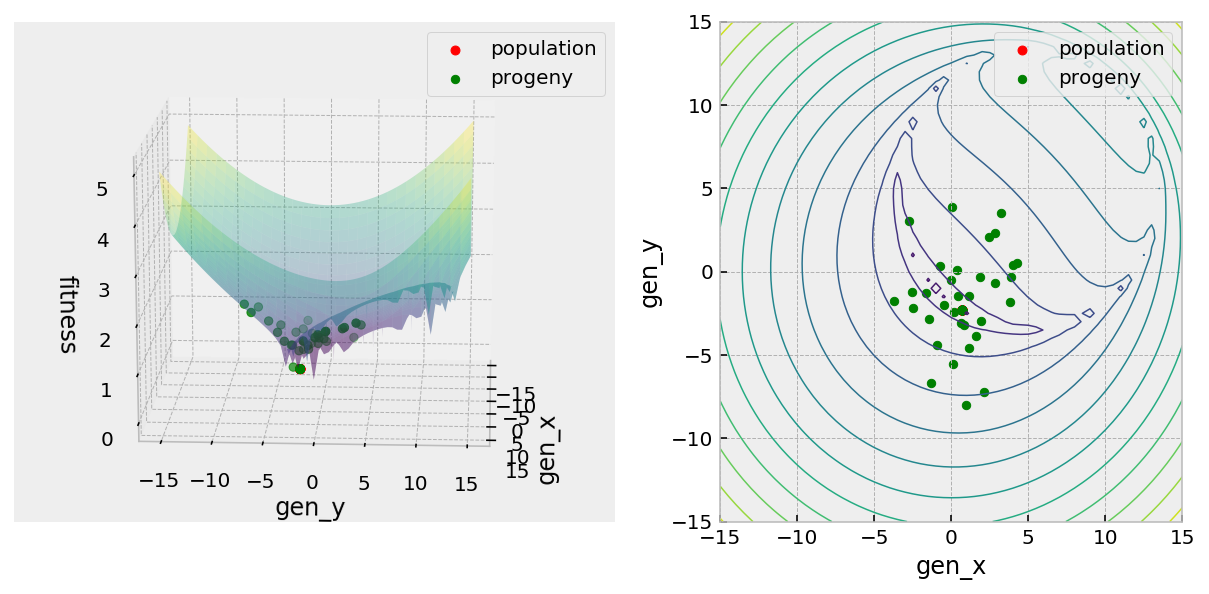

Generation 45


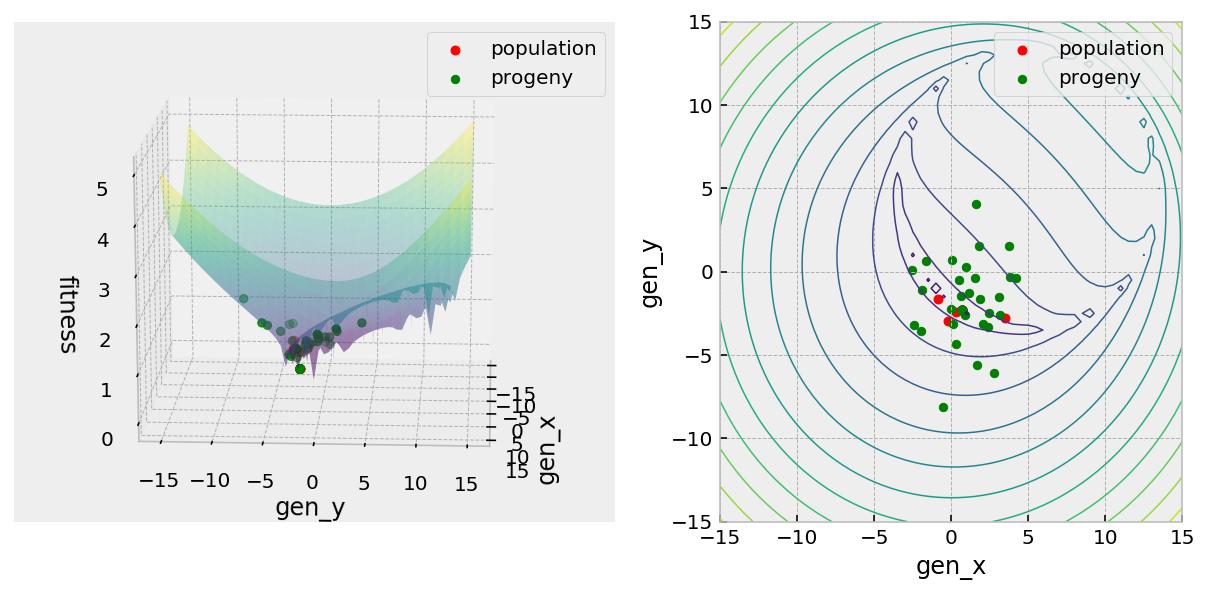

Generation 49


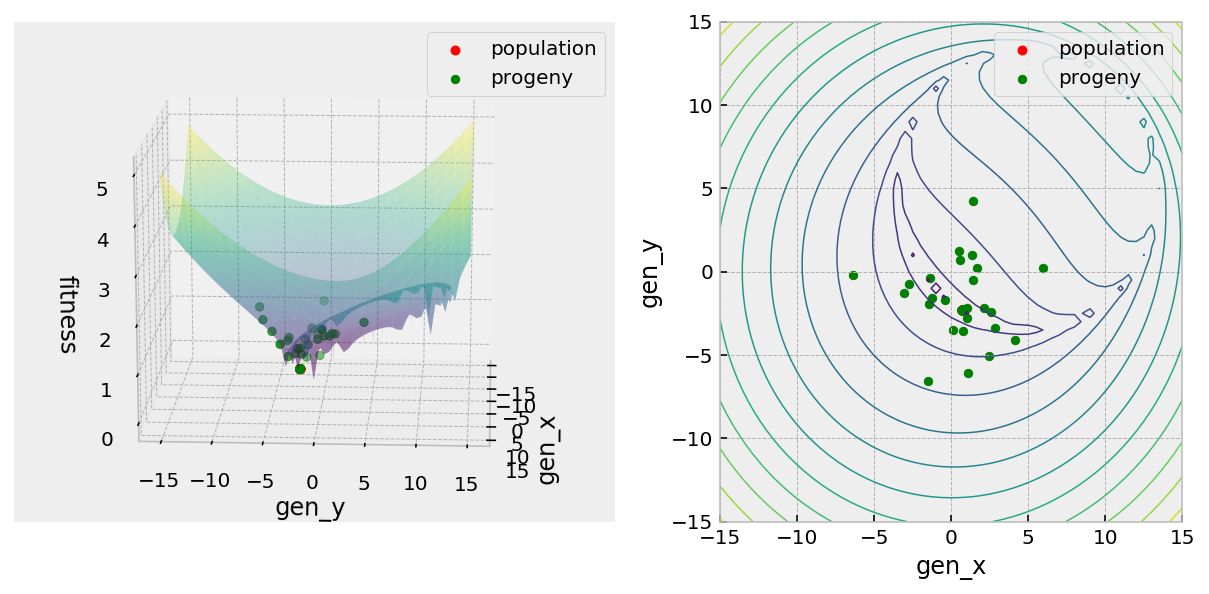

In [16]:
print("Generation 0")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    0,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 5")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    5,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 10")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    10,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 20")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    20,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 30")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    30,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 40")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    40,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 45")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    45,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)
print("Generation 49")
EA_plt_gen(
    f,
    domain,
    grph_steps,
    genera_res,
    run_s,
    49,
    a=a,
    b=b,
    imgsize=img_size,
    ratio_w=ratio_w,
    ln=ln,
)

## 100 Executions of the EA
1 Experiment
>L-> 1 Parameter set for the experiment.
>>L-> 100 Replicate.
>>>L-> Each replicate is different due to randomness effects.

### Changing parameters

In [17]:
# Restarting seed
np.random.seed(42)

# Algorithm parameters
## Number of replicates
rep_n = 100
## Number of generations
gen_f = 200

### Execution

In [18]:
%%time
fitness_res = EA_exp_only_fitness(
    rep_n,
    gen_f,
    f,
    domain,
    pop_s,
    par_s,
    prog_s,
    mut_p,
    mut_s,
    par_selection,
    crossover,
    mutation,
    sur_selection,
)

Wall time: 6min 7s


In [19]:
fitness_res.head()

run  seed  generation  fitness_min  fitness_max  fitness_mean  fitness_std
0    0  7270           0     0.864543     4.080284      2.341369     0.866283
1    0  7270           1     0.465448     1.406234      0.862808     0.182873
2    0  7270           2     0.305441     0.864543      0.582228     0.171976
3    0  7270           3     0.305441     0.772833      0.440054     0.189549
4    0  7270           4     0.305441     0.648224      0.330580     0.082864

In [20]:
fitness_res.tail()

run  seed  generation  fitness_min  fitness_max  fitness_mean  \
20095   99  5136         196     0.080943     0.080943      0.080943   
20096   99  5136         197     0.080943     0.080943      0.080943   
20097   99  5136         198     0.080943     0.916090      0.188584   
20098   99  5136         199     0.080943     0.771375      0.115465   
20099   99  5136         200     0.080943     0.080943      0.080943   

       fitness_std  
20095     0.000000  
20096     0.000000  
20097     0.265516  
20098     0.154385  
20099     0.000000

### Data Analysis

Top 10 fittest

In [21]:
z = gen_f
query = fitness_res["generation"] == z
fitness_res[query].sort_values(by=["fitness_min"]).head(10)

run  seed  generation  fitness_min  fitness_max  fitness_mean  \
2813    13  2912         200     0.068832     0.742257      0.129404   
8843    43  9199         200     0.072489     0.896644      0.153944   
200      0  7270         200     0.075157     0.075157      0.075157   
7034    34  5136         200     0.080943     0.080943      0.080943   
20099   99  5136         200     0.080943     0.080943      0.080943   
14069   69  1234         200     0.087960     0.087960      0.087960   
4823    23  9766         200     0.088609     0.088609      0.088609   
16481   81   796         200     0.099754     0.308903      0.110212   
15878   78  4947         200     0.104186     1.054101      0.187911   
12461   61  6103         200     0.104425     0.104425      0.104425   

       fitness_std  
2813      0.187726  
8843      0.250731  
200       0.000000  
7034      0.000000  
20099     0.000000  
14069     0.000000  
4823      0.000000  
16481     0.046767  
15878     0.260281  
12461     0.000000

Top 10 least fit

In [22]:
fitness_res[query].sort_values(by=["fitness_min"], ascending=False).head(10)

run  seed  generation  fitness_min  fitness_max  fitness_mean  \
2612    12  4423         200     0.274701     0.663052      0.294119   
9245    45   762         200     0.253576     0.253576      0.253576   
18893   93  2445         200     0.251159     1.156855      0.338052   
19496   96  9167         200     0.238447     0.966337      0.299348   
6431    31  9167         200     0.238447     0.966337      0.299348   
18491   91  4912         200     0.236458     0.236458      0.236458   
16079   79  3464         200     0.235635     0.944334      0.300417   
14873   73  3533         200     0.235577     0.235577      0.235577   
10652   52  6629         200     0.233156     1.247678      0.398567   
16682   82  6531         200     0.220847     0.755234      0.247567   

       fitness_std  
2612      0.086838  
9245      0.000000  
18893     0.267715  
19496     0.191374  
6431      0.191374  
18491     0.000000  
16079     0.200369  
14873     0.000000  
10652     0.351123  
16682     0.119492

### Visualization

Aggregated results

In [23]:
z = gen_f
query = fitness_res["generation"] == z
type(fitness_res[query]["fitness_mean"])

pandas.core.series.Series

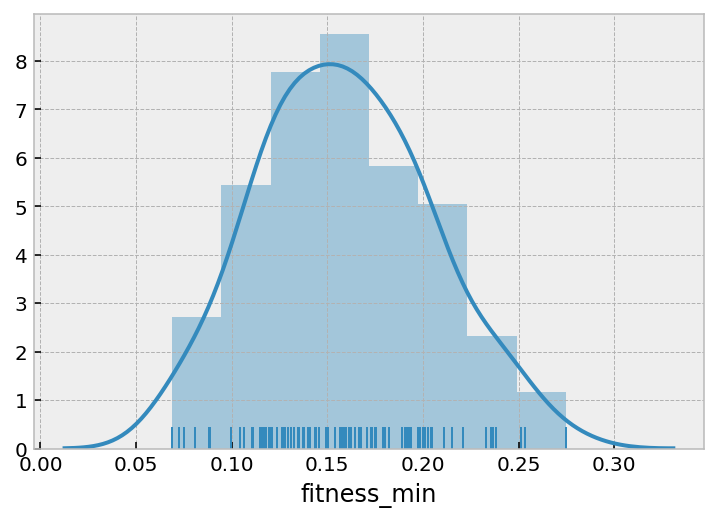

In [24]:
sns.distplot(fitness_res[query]["fitness_min"], rug=True)

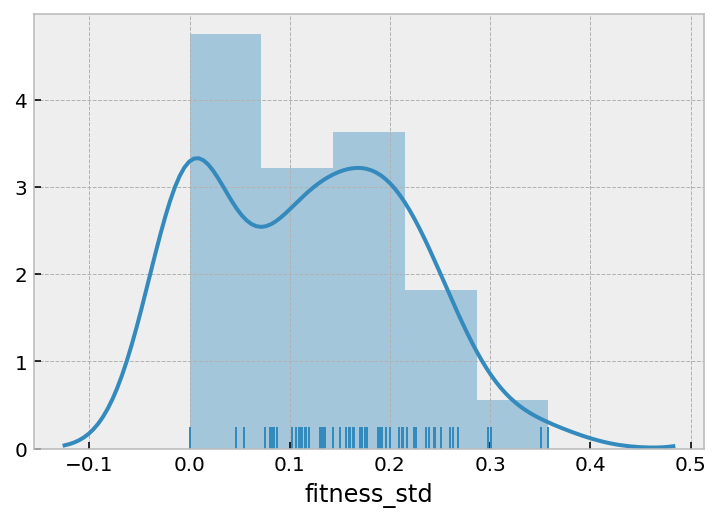

In [25]:
sns.distplot(fitness_res[query]["fitness_std"], rug=True)

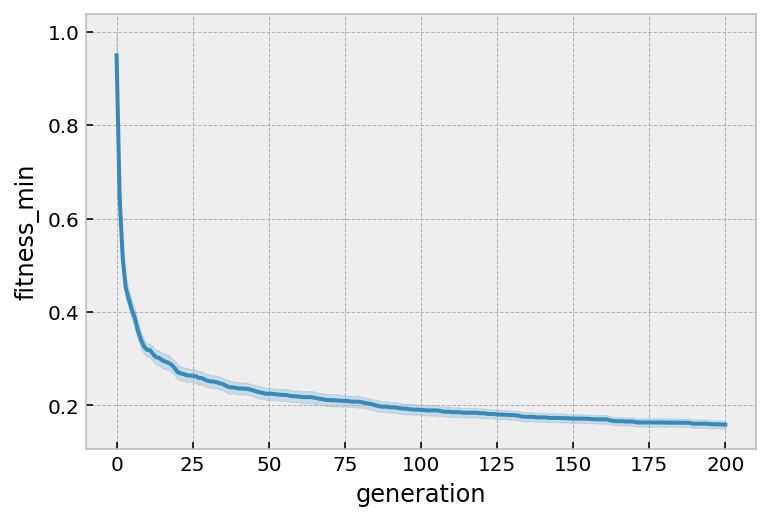

In [26]:
sns.lineplot(x="generation", y="fitness_min", data=fitness_res)